# Business Introduction(Supermarket Customer)

Using this jupiter notebook i want to cleanning the data from 'Supermarket Customer' database. after the data are clean and find the problem , i will do business analysis to make several recomendation strategy and improvement for the Supurmarket Custumer using Tableau.

1. I want to analysisi

    
    



In [467]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns

In [468]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [470]:
# describe
df.describe().loc[['mean','min','max']].T

,mean,min,max
ID,5592.159821,0.0,11191.0
Year_Birth,1968.805804,1893.0,1996.0
Income,52247.251354,1730.0,666666.0
Kidhome,0.444196,0.0,2.0
Teenhome,0.506250,0.0,2.0
Recency,49.109375,0.0,99.0
MntWines,303.935714,0.0,1493.0
MntFruits,26.302232,0.0,199.0
MntMeatProducts,166.950000,0.0,1725.0
MntFishProducts,37.525446,0.0,259.0


In [471]:
# check Null Value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# 1. handle the null value to median

In [472]:
df['Income'].isnull().sum()

24

In [473]:
#quick handle, its 24 data point in income column, fill it with median
df['Income'].fillna(df['Income'].median(),inplace=True)

# check again
df['Income'].isnull().sum()

0

# 2. Delete unused column (Z_CostContact, Z_Revenue)

In [474]:
# quick handle, delete the 2 constant value column
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# check again
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Cleaning Marital Status Category 
make a group category calls 'other', group from(Alone, Absurd, YOLO) 

In [475]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [476]:
df['Marital_Status'].replace({'Absurd':'Other', 'Alone':'Other', 'YOLO':'Other'}, inplace=True)

# check it again
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64

# 4. Outlier in Year Birth
1. move the outlier
2. change the year birth to age
3. add colum age category(distance 20 years)

In [477]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [478]:
#get the current year
current_year = 2014

# Age
df['Age'] = current_year - df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,0,0,0,0,0,0,0,47
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,0,0,0,1,0,0,0,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,0,1,0,0,0,0,0,33
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,0,0,0,0,0,0,0,58


In [479]:
# colum age category
def age_category(Age):
    if Age < 18:
        return 'teenagers'
    elif 18 <= Age < 30:
        return 'young mature'
    elif 30 <= Age < 50:
        return 'mature'
    else:
        return 'elderly'

# Menambahkan kolom kategori umur
df['age_category'] = df['Age'].apply(age_category)

# Menampilkan DataFrame
df[['Age','age_category']]

,Age,age_category
0,57,elderly
1,60,elderly
2,49,mature
3,30,mature
4,33,mature
...,...,...
2235,47,mature
2236,68,elderly
2237,33,mature
2238,58,elderly


In [480]:
# find the outlier
fig = px.box(df, y="Year_Birth", title='boxplot of year birth')
fig.show()

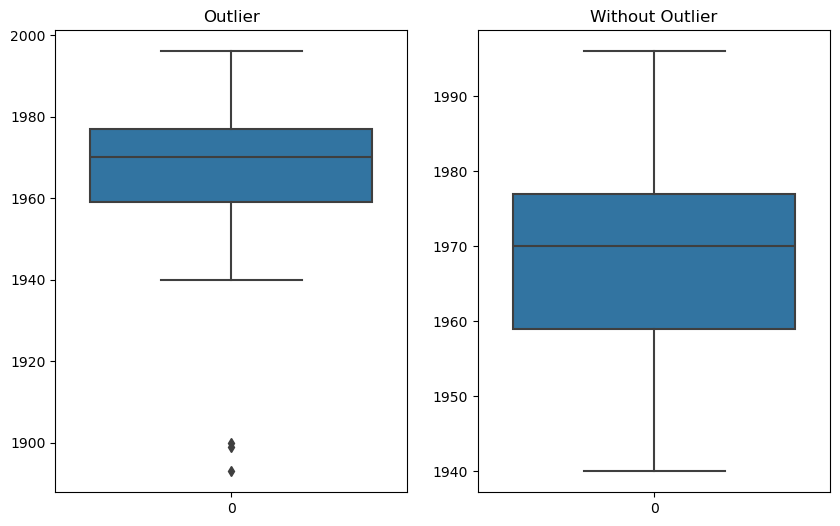

In [481]:
# 1. IQR
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

# 2. lower and upper 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Boxplot outlier
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Year_Birth'])
plt.title('Outlier')

# 4. Outlier filter from dataset
df = df[(df['Year_Birth'] >= lower_bound) & (df['Year_Birth'] <= upper_bound)]

# 5. Boxplot without outlier
plt.subplot(1, 2, 2)
sns.boxplot(df['Year_Birth'])
plt.title('Without Outlier')

plt.show()

# Add total purchase and total spending

In [482]:
# Calculate total spending for each customer
df['Total Spending($)'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

total_customer_spending = df.groupby('ID')['Total Spending($)'].sum().reset_index()
print(total_customer_spending)


         ID  Total Spending($)
0         0               1198
1         1                577
2         9                120
3        13                 32
4        17               1028
...     ...                ...
2232  11178                 32
2233  11181                  8
2234  11187                 69
2235  11188                 89
2236  11191                139

[2237 rows x 2 columns]


/var/folders/yr/2dmf6pwj0499q1y_d9r7spnh0000gn/T/ipykernel_2875/159095848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [483]:
# Calculate total purchase for each customer
df['Total Purchase Time'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 

total_customer_purchase = df.groupby('ID')['Total Purchase Time'].sum().reset_index()
print(total_customer_purchase)

         ID  Total Purchase Time
0         0                   16
1         1                   17
2         9                    7
3        13                    4
4        17                   24
...     ...                  ...
2232  11178                    4
2233  11181                    0
2234  11187                    6
2235  11188                    6
2236  11191                    7

[2237 rows x 2 columns]


/var/folders/yr/2dmf6pwj0499q1y_d9r7spnh0000gn/T/ipykernel_2875/3230986285.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [484]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total Spending($),Total Purchase Time
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52227.407689,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,...,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,0.149307,45.098346,605.743406,12.544032
std,3245.118591,11.701917,25043.266830,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,...,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.356471,11.701917,601.840466,7.205919
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,2829.000000,1959.000000,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,69.000000,6.000000
50%,5455.000000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,396.000000,12.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1045.000000,18.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74.000000,2525.000000,32.000000


# change the column name


In [485]:
df.rename(columns={'Response': 'AcceptedLastCmp'}, inplace=True)
df

/var/folders/yr/2dmf6pwj0499q1y_d9r7spnh0000gn/T/ipykernel_2875/501859296.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Age,age_category,Total Spending($),Total Purchase Time
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,1,57,elderly,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,60,elderly,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,49,mature,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,30,mature,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,33,mature,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,47,mature,1341,16
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,0,68,elderly,444,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,0,33,mature,1241,18
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,58,elderly,843,21


1. add column total purchase and total spending
2. add colum age category(setiap 20 tahun)
3. duplicate row

# Delete the duplicate row

In [486]:
# check the duplicate value
check_columns = df.columns[1:].tolist()

# check on selected columns
duplicates = df.duplicated(subset=check_columns, keep=False)

# select rows that are duplicates
duplicate_rows = df[duplicates].sort_values(by=check_columns)
duplicate_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Age,age_category,Total Spending($),Total Purchase Time
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,0,0,0,0,0,1,71,elderly,902,22
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,0,0,0,0,0,1,71,elderly,902,22
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,0,0,0,0,0,0,68,elderly,317,11
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,0,0,0,0,0,0,68,elderly,317,11
182,10562,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,...,0,0,0,0,0,0,68,elderly,1033,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,8175,1992,Graduation,Married,34935.0,0,0,21-06-2013,71,34,...,0,0,0,0,0,0,22,young mature,137,7
392,2669,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,0,0,0,0,0,0,21,young mature,1127,15
928,10037,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,0,0,0,0,0,0,21,young mature,1127,15
696,8315,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,0,0,0,0,0,0,19,young mature,23,3


In [487]:
# Number of duplicate row should be remove
duplicates = df.duplicated(subset=check_columns, keep='first')
duplicate_rows = df[duplicates]
duplicate_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Age,age_category,Total Spending($),Total Purchase Time
83,4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,...,0,0,0,0,0,0,51,elderly,318,10
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,...,0,0,1,0,0,0,63,elderly,978,24
281,10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,...,0,0,0,0,0,0,38,mature,576,14
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,0,0,0,0,0,0,68,elderly,317,11
363,933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,...,0,0,0,0,0,0,36,mature,25,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,4838,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,...,0,0,0,0,0,0,36,mature,15,3
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,...,1,1,0,0,0,1,32,mature,1438,20
2225,4749,1968,Graduation,Together,58554.0,1,1,26-09-2012,55,368,...,0,0,0,0,0,0,46,mature,586,16
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,0,0,0,0,0,0,40,mature,30,3


In [488]:
# delete duplicate row
unique_rows = df.drop_duplicates(subset=check_columns).shape[0]
df = df.drop_duplicates(subset=check_columns)

print('Number of row after removing duplicates :', unique_rows)

# check again
duplicate_rows = df[duplicates].sort_values(by=check_columns)
duplicate_rows

Number of row after removing duplicates : 2055


/var/folders/yr/2dmf6pwj0499q1y_d9r7spnh0000gn/T/ipykernel_2875/2933438978.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedLastCmp,Age,age_category,Total Spending($),Total Purchase Time


In [489]:
# Export DataFrame to file CSV file
df.to_csv('1Clean_Data_Supermarket_Customer.csv', index=False)

print("\nDataFrame telah diekspor ke '1Clean_Data_Supermarket_Customer.csv'")


DataFrame telah diekspor ke '1Clean_Data_Supermarket_Customer.csv'
